# 🌍☀️🔄 Modifying orbital characteristics with *SpeedyWeather*

### Notebook by Dr. Alex Baker, NCAS / University of Reading

In this notebook, we simulate the effect of making significant changes to Earth's planetary characteristics. In three separate experiments, we will modify Earth's **axial tilt**, its **radius** and **gravitational acceleration**, and its **rotational frequency**.


## 🎯 Objective
By systematically modifying Earth’s orbital and physical parameters, we aim to investigate their role in setting large-scale circulation, seasonality, and the energy balance of the climate system.

## 🧪 Experiment Setup

**🔄 Experiment #1 — reduce Earth's axial tilt**

Orbital quantities vary or evolve over multi-milennial timescales. Axial tilt (with respect to the orbital plane, or *ecliptic*) varies between 22.1$\degree$ and 24.5$\degree$ with a periodicity of ~41,000 years. This *obliquity* is one of the Croll-Milankovitch cycles in Earth's orbital geometry, which have paced Quaternary climate fluctuations (Hays *et al*., 1976). Axial tilt is a key factor in the seasonality extant in Earth's climate. In this experiment, we will halve axial tilt from its present-day value of 23.4$\degree$ to 11.7$\degree$.

**🪐 Experiment #2 — mimic Mars' radius and *g***

In this experiment, we will reduce the planetary radius and value of *g* to those of Mars. For simplicity, we will reduce a mean radius from 6,371 km to 3,373 km, and we will reduce *g* from 9.81 ms$^{-1}$ to 3.69 ms$^{-1}$. Earth is an oblate spheroid, a quasi-sphere with an equatorial radius that slightly exceeds its polar radius (i.e., Earth slightly bulges at the equator), and this is also true of Mars.

**⏳ Experiment #3 — reduce Earth's rotational frequency**

Due to tidal friction by the Moon, Earth's rotation rate experiences high-frequency modulation and, over deep Earth history, has slowed (see [here](https://core2.gsfc.nasa.gov/ggfc/tides/intro.html) for a few helpful references). Rotation induces the Coriolis effect, which is responsible for phenomena such as cyclones and trade winds. In this experiment, we will halve the rotational frequency and see how such a dramatic change could affect climate. Note two things: (i) that this won't change the length of a day, as this is hard-coded in *SpeedyWeather.jl*, so we're essentially reducing the Coriolis effect (perhaps more of a science-fiction experiment); (ii) we use a reduced timestep for model stability.

**References**

Hays, J. D., Imbrie, J., and Shackleton, N. J., 1976. [Variations in the Earth's Orbit: Pacemaker of the Ice Ages](https://www.science.org/doi/10.1126/science.194.4270.1121). *Science* **194**, 1121-1132.

** **

## 🔬 🧠 Guiding Questions

**Experiment 1 – Axial Tilt (Obliquity)**

- How does reducing axial tilt affect the strength of the seasons?

- Do the equator-to-pole temperature gradients become stronger or weaker?

- How does precipitation respond — does the ITCZ migrate less throughout the year?

**Experiment 2 – Mars-like Radius & Gravity**

- How do changes in radius and gravity affect the vertical structure of the atmosphere?

- Are winds stronger or weaker compared to Earth-like values?

- Does the Hadley Cell become shallower or deeper?

- Can you detect changes in baroclinic activity (eddies, storm tracks)?

**Experiment 3 – Slowed Rotation**

- How does reducing the Coriolis force impact the jet streams?

- Do Hadley Cells expand poleward?

- What happens to storm tracks and wave activity?

- Does the ITCZ broaden or shift?

**Installation**

This cell only needs to be run once.

In [3]:
# using Pkg
# Pkg.status("SpeedyWeather")
# Pkg.add(url="https://github.com/SpeedyWeather/SpeedyWeather.jl",rev="Main")

**.jl packages**

In [2]:
using SpeedyWeather
using GeoMakie
using CairoMakie
using Dates

[ Info: Precompiling GeoMakie [db073c08-6b98-4ee5-b6a4-5efafb3259c6] 
[ Info: Precompiling StructArraysGPUArraysCoreExt [cbbf52aa-d660-55d4-8a5a-33845bbaa85d] (cache misses: wrong dep version loaded (4))
[ Info: Precompiling DomainSetsMakieExt [da481366-01c8-5b4d-b359-47a10c8532e7] (cache misses: wrong dep version loaded (4))
[ Info: Precompiling SpeedyWeatherMakieExt [5b33269b-99f4-5abe-8178-09ad803418e6] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling SpeedyWeatherGeoMakieExt [e8a06b79-132c-5f7f-a25c-66406c5f936d] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0] (cache misses: wrong dep version loaded (4))


## 1️⃣ 🗂️ Define experiments: name, grid, timestep, duration, and planet

In this section, we define the control simulation and the three orbital experiments. You only need to run the control simulation once and will then need to run experiments #1, #2 and #3 one at a time (i.e., choose one experiment cell to run and then move to section 2). Running each experiment will require you to re-run the sections below that set up, initialise and run the model.

*SpectralGrid*

spectral_grid = SpectralGrid(trunc=31, dealiasing=3, nlayers=8)
spectral_grid

*Control*

In [16]:
run_control = true  # false = control experiment not run
timestep = 40
duration_yr = 10
spectral_grid

SpectralGrid{Spectrum{...}, OctahedralGaussianGrid{...}}
├ Number format: Float32
├ Spectral:      T31 LowerTriangularMatrix
├ Grid:          64-ring OctahedralGaussianGrid, 5248 grid points
├ Resolution:    2.8°, 312km (at 6371km radius)
├ Vertical:      8-layer atmosphere, 2-layer land
└ Architecture:  CPU using Array

*Experiment #1*

In [17]:
experiment_name = "orbital_half_tilt"
timestep = 40
duration_yr = 10
earth = Earth(spectral_grid,axial_tilt=11.7)  # unit is degrees
earth

Earth{Float32} <: SpeedyWeather.AbstractPlanet
├ radius::Float32 = 6.371e6
├ rotation::Float32 = 7.29e-5
├ gravity::Float32 = 9.81
├ daily_cycle::Bool = true
├ length_of_day::Second = 86400 seconds
├ seasonal_cycle::Bool = true
├ length_of_year::Second = 31557600 seconds
├ equinox::DateTime = 2000-03-20T00:00:00
├ axial_tilt::Float32 = 11.7
└ solar_constant::Float32 = 1365.0

*Experiment #2*

In [19]:
experiment_name = "orbital_mars"
earth = Earth(spectral_grid, gravity=3.69, radius=3.3727e6)
timestep = 40
duration_yr = 10
earth

Earth{Float32} <: SpeedyWeather.AbstractPlanet
├ radius::Float32 = 3.3727e6
├ rotation::Float32 = 7.29e-5
├ gravity::Float32 = 3.69
├ daily_cycle::Bool = true
├ length_of_day::Second = 86400 seconds
├ seasonal_cycle::Bool = true
├ length_of_year::Second = 31557600 seconds
├ equinox::DateTime = 2000-03-20T00:00:00
├ axial_tilt::Float32 = 23.4
└ solar_constant::Float32 = 1365.0

*Experiment #3*

In [6]:
experiment_name = "orbital_half_rotation"
timestep = 12
duration_yr = 10
earth = Earth(spectral_grid)
earth.rotation *= 0.5   # half the rotation rate; unit is rad/s
earth

Earth{Float32} <: SpeedyWeather.AbstractPlanet
├ radius::Float32 = 6.371e6
├ rotation::Float32 = 3.645e-5
├ gravity::Float32 = 9.81
├ daily_cycle::Bool = true
├ length_of_day::Second = 86400 seconds
├ seasonal_cycle::Bool = true
├ length_of_year::Second = 31557600 seconds
├ equinox::DateTime = 2000-03-20T00:00:00
├ axial_tilt::Float32 = 23.4
└ solar_constant::Float32 = 1365.0

👉 You may run `?Earth` to inspect the meanings of parameters.

In [7]:
?Earth

search: Earth earth March



Create a struct `Earth<:AbstractPlanet`, with the following physical/orbital characteristics. Note that `radius` is not part of it as this should be chosen in `SpectralGrid`. Keyword arguments are

  * `radius::AbstractFloat`: Earth's radius [m]
  * `rotation::AbstractFloat`: angular frequency of Earth's rotation [rad/s]
  * `gravity::AbstractFloat`: gravitational acceleration [m/s^2]
  * `daily_cycle::Bool`: switch on/off daily cycle
  * `length_of_day::Second`: Seconds in a daily rotation
  * `seasonal_cycle::Bool`: switch on/off seasonal cycle
  * `length_of_year::Second`: Seconds in an orbit around the sun
  * `equinox::DateTime`: time of spring equinox (year irrelevant)
  * `axial_tilt::AbstractFloat`: angle [˚] rotation axis tilt wrt to orbit
  * `solar_constant::AbstractFloat`: Total solar irradiance at the distance of 1 AU [W/m²]


## 2️⃣ 💾 Define the output

First, change the path to wherever you wish to save model output data. Then specify additional outputs or use `SpeedyWeather.AllOutputVariables()` (n.b., expansion: `...` in Julia is equivalent to `*` in Python).

In [8]:
path = "./"

"./"

In [9]:
if run_control == true
    output_ctl = NetCDFOutput(spectral_grid, PrimitiveWetModel, path=path, id="control", output_dt=Month(1))
    #add!(output_ctl, SpeedyWeather.AllOutputVariables()...)
    add!(output_ctl, SpeedyWeather.AllOutputVariables()..., SpeedyWeather.OceanOutput()..., SpeedyWeather.LandOutput()..., SpeedyWeather.RadiationOutput()..., SpeedyWeather.PrecipitationOutput()..., SpeedyWeather.SurfaceFluxesOutput()...)
end
output_exp = NetCDFOutput(spectral_grid, PrimitiveWetModel, path=path, id=experiment_name, output_dt=Month(1))
#add!(output_exp, SpeedyWeather.AllOutputVariables()...)
add!(output_exp, SpeedyWeather.AllOutputVariables()..., SpeedyWeather.OceanOutput()..., SpeedyWeather.LandOutput()..., SpeedyWeather.RadiationOutput()..., SpeedyWeather.PrecipitationOutput()..., SpeedyWeather.SurfaceFluxesOutput()...)

NetCDFOutput{Field{Float32, 1, Vector{Float32}, FullGaussianGrid{SpeedyWeatherInternals.Architectures.CPU{KernelAbstractions.CPU}, Vector{UnitRange{Int64}}, Vector{Int64}}}}
├ status: inactive/uninitialized
├ write restart file: true (if active)
├ interpolator: AnvilInterpolator{Float32, RingGrids.GridGeometry{OctahedralGaussianGrid{SpeedyWeatherInternals.Architectures.CPU{KernelAbstractions.CPU}, Vector{UnitRange{Int64}}, Vector{Int64}}, Vector{Float32}, Vector{Int64}}, RingGrids.AnvilLocator{Float32, Vector{Float32}, Vector{Int64}}}
├ path: output.nc (overwrite=false)
├ frequency: 2592000 seconds
└┐ variables:
 ├ roff: river runoff [m]
 ├ slf: Surface latent heat flux (positive up) [W/m^2]
 ├ sma: soil moisture availability [1]
 ├ rain_conv: accumulated convective rain [mm]
 ├ random_pattern: random pattern [1]
 ├ sru: Surface shortwave radiation up [W/m^2]
 ├ rain_cond: accumulated large-scale rain [mm]
 ├ lsm: land-sea mask (1=land, 0=sea) [1]
 ├ st: soil temperature [degC]
 ├ temp

## 3️⃣ ⚙️ Model components, parameterisation choices, timestepping, albedo fix

In [10]:
temperature = LandBucketTemperature(spectral_grid)
soil_moisture = LandBucketMoisture(spectral_grid)
land = LandModel(spectral_grid; temperature, soil_moisture)
ocean = SlabOcean(spectral_grid)

large_scale_condensation = ImplicitCondensation(spectral_grid)
convection = SimplifiedBettsMiller(spectral_grid)
vertical_advection = WENOVerticalAdvection(spectral_grid)

if run_control == true
    time_stepping_ctl = Leapfrog(spectral_grid, Δt_at_T31=Minute(40))  # CPL this is the standard time step
end
time_stepping_exp = Leapfrog(spectral_grid, Δt_at_T31=Minute(timestep))

#albedo = Albedo(GlobalConstantAlbedo(spectral_grid, albedo=0.06), AlbedoClimatology(spectral_grid))  # fix ocean albedo
albedo = Albedo(ocean=OceanSeaIceAlbedo(spectral_grid), land=AlbedoClimatology(spectral_grid))
set!(albedo.land, (λ, φ) -> 0.1, add=true)  # set albedo offset for diffuse radiation

time_stepping_exp

Leapfrog{Float32} <: SpeedyWeather.AbstractTimeStepper
├ trunc::Int64 = 31
├ nsteps::Int64 = 2
├ Δt_at_T31::Second = 720 seconds
├ radius::Float32 = 6.371e6
├ adjust_with_output::Bool = true
├ robert_filter::Float32 = 0.1
├ williams_filter::Float32 = 0.53
├ Δt_millisec::Millisecond = 720000 milliseconds
├ Δt_sec::Float32 = 720.0
└ Δt::Float32 = 0.00011301209

## 4️⃣ 🚀 Create models and initialise simulations

In [11]:
if run_control == true
    model_ctl = PrimitiveWetModel(spectral_grid; land, ocean, large_scale_condensation, convection, vertical_advection, albedo, time_stepping=time_stepping_ctl, output=output_ctl)
    simulation_ctl = initialize!(model_ctl)
end
model_exp = PrimitiveWetModel(spectral_grid; land, ocean, large_scale_condensation, convection, vertical_advection, albedo, time_stepping=time_stepping_exp, planet=earth, output=output_exp)
simulation_exp = initialize!(model_exp)

model_exp

PrimitiveWetModel <: PrimitiveWet
├ spectral_grid: SpectralGrid{SpeedyWeatherInternals.Architectures.CPU{KernelAbstractions.CPU},...
├ architecture: SpeedyWeatherInternals.Architectures.CPU{KernelAbstractions.CPU}
├ dynamics: Bool
├ geometry: Geometry{Float32, OctahedralGaussianGrid{SpeedyWeatherInternals.Architectures.CPU{K...
├ planet: Earth{Float32}
├ atmosphere: EarthAtmosphere{Float32}
├ coriolis: Coriolis{Float32, Vector{Float32}}
├ geopotential: Geopotential{Float32, Vector{Float32}}
├ adiabatic_conversion: AdiabaticConversion{Float32, Vector{Float32}}
├ particle_advection: Nothing
├ initial_conditions: InitialConditions{ZonalWind, PressureOnOrography, JablonowskiTemperature,...
├ forcing: Nothing
├ drag: Nothing
├ random_process: Nothing
├ tracers: Dict{Symbol, Tracer}
├ orography: EarthOrography{Float32, Field{Float32, 1, Vector{Float32}, OctahedralGaussianGrid{...
├ land_sea_mask: EarthLandSeaMask{Float32, Field{Float32, 1, Vector{Float32}, OctahedralGaussia...
├ ocean: SlabO

## 5️⃣ ▶️ Run the control and peturbed experiment simulations

In [12]:
if run_control == true
    run!(simulation_ctl, period=Year(duration_yr), output=true)
end
run!(simulation_exp, period=Year(duration_yr), output=true)

Weather is speedy: run_control_0002 100%|█| Time: 0:29:43 (484.51 years/day)
Weather is speedy: run_orbital_half_rotation_0001 100% Time: 2:44:47 (87.38 years/day)m


Simulation{PrimitiveWetModel}
├ prognostic_variables::PrognosticVariables{...}
├ diagnostic_variables::DiagnosticVariables{...}
└ model::PrimitiveWetModel{...}

## 6️⃣ 🗺️📉 Plot simple difference maps

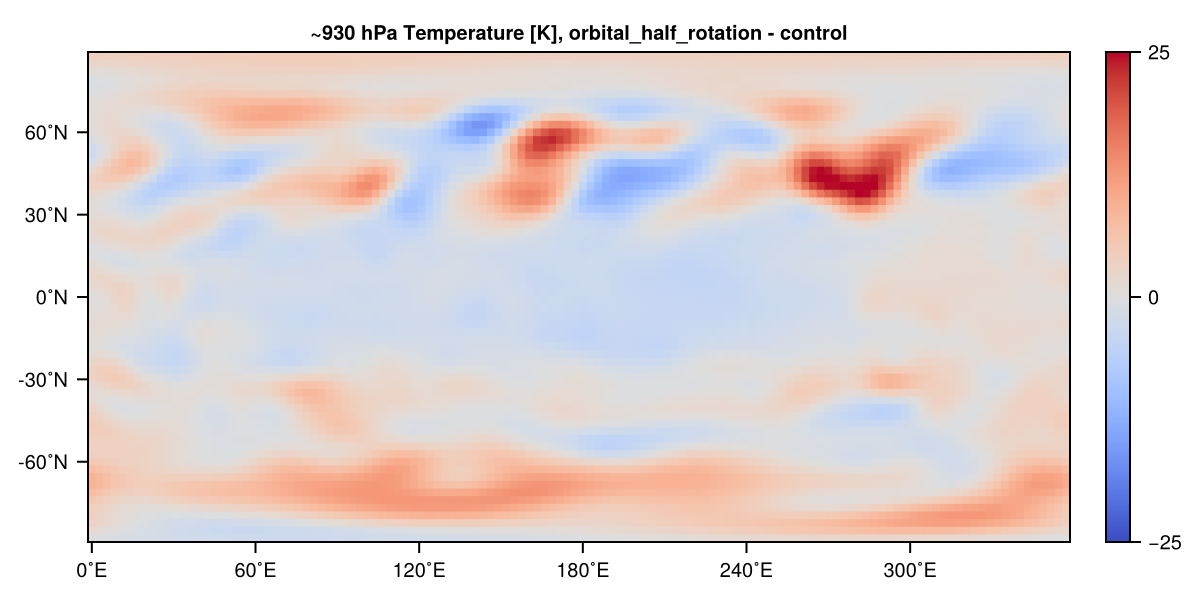

In [13]:
T = simulation_exp.diagnostic_variables.grid.temp_grid[:, 8] - simulation_ctl.diagnostic_variables.grid.temp_grid[:, 8]
heatmap(T, colorrange=(-25,25), colormap = "coolwarm", title="~930 hPa Temperature [K], "*experiment_name*" - control")

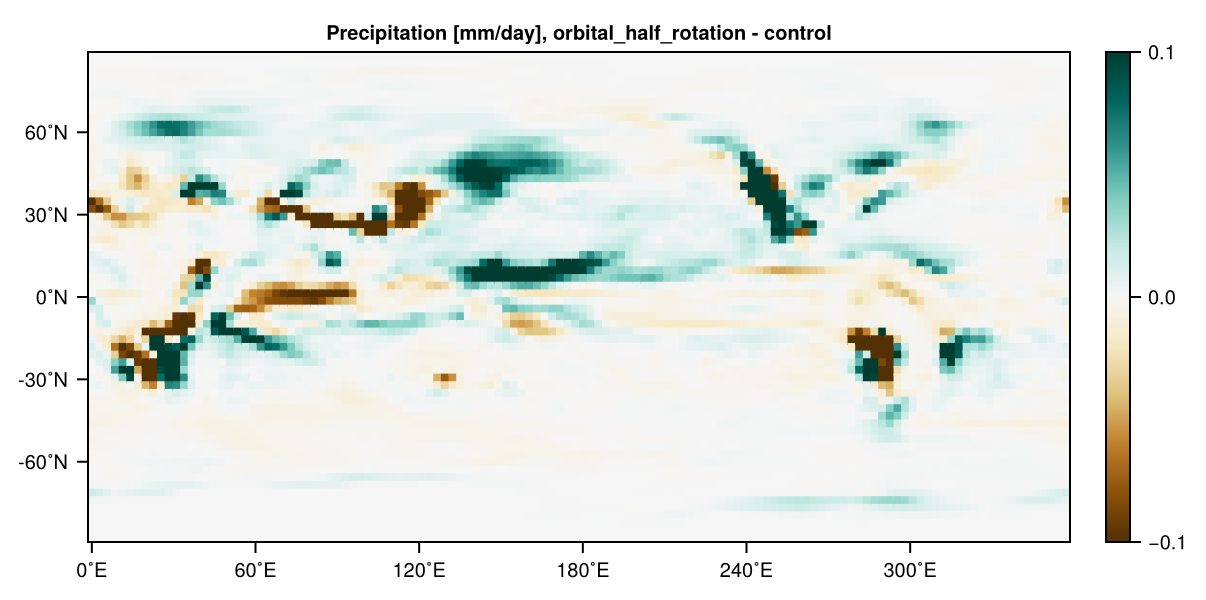

In [14]:
P = simulation_exp.diagnostic_variables.physics.rain_large_scale - simulation_ctl.diagnostic_variables.physics.rain_large_scale
heatmap(P, colorrange=(-0.1,0.1), colormap = "BrBG", title="Precipitation [mm/day], "*experiment_name*" - control")

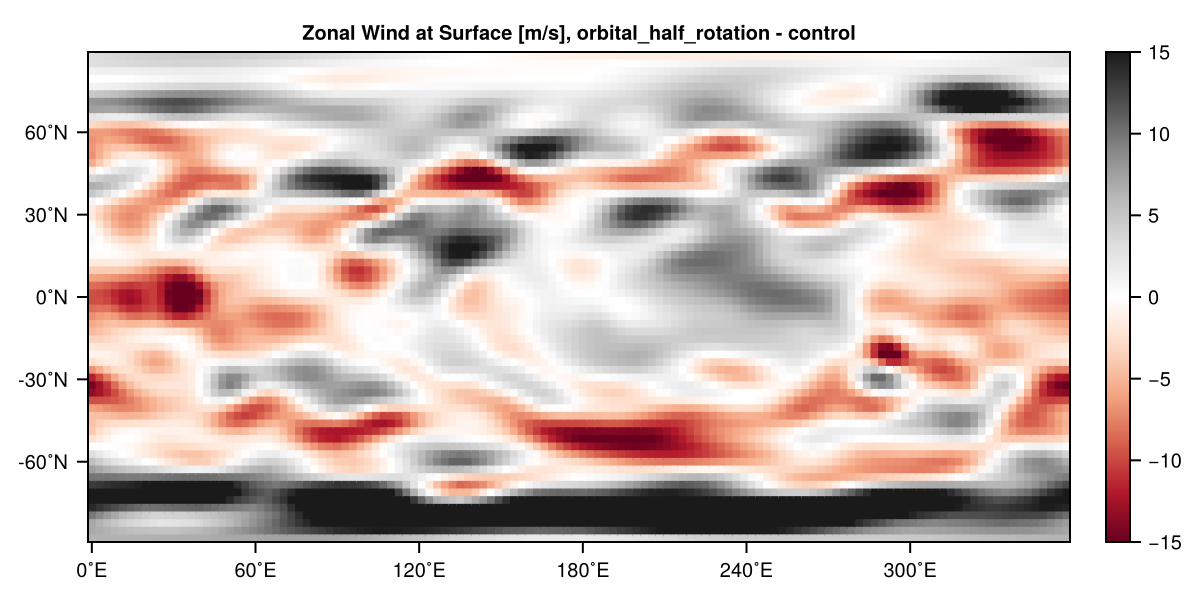

In [15]:
U = simulation_exp.diagnostic_variables.grid.u_grid[:, 8] - simulation_ctl.diagnostic_variables.grid.u_grid[:, 8]
heatmap(U, colorrange=(-15,15), colormap = "RdGy", title="Zonal Wind at Surface [m/s], "*experiment_name*" - control")